Hydro inflow changes

<xarray.Dataset>
Dimensions:  (plant: 31, time: 8760)
Coordinates:
  * plant    (plant) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 63
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    inflow   (plant, time) float64 ...
Frozen({'plant': <xarray.IndexVariable 'plant' (plant: 31)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], dtype=int64), 'time': <xarray.IndexVariable 'time' (time: 8760)>
array(['2013-01-01T00:00:00.000000000', '2013-01-01T01:00:00.000000000',
       '2013-01-01T02:00:00.000000000', ..., '2013-12-31T21:00:00.000000000',
       '2013-12-31T22:00:00.000000000', '2013-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]'), 'inflow': <xarray.Variable (plant: 31, time: 8760)>
[271560 values with dtype=float64]})
<xarray.DataArray 'inflow' (plant: 31, time: 8760)>
[271560 values with dtype=float64]
Coordinates:
  * plant    (plant)

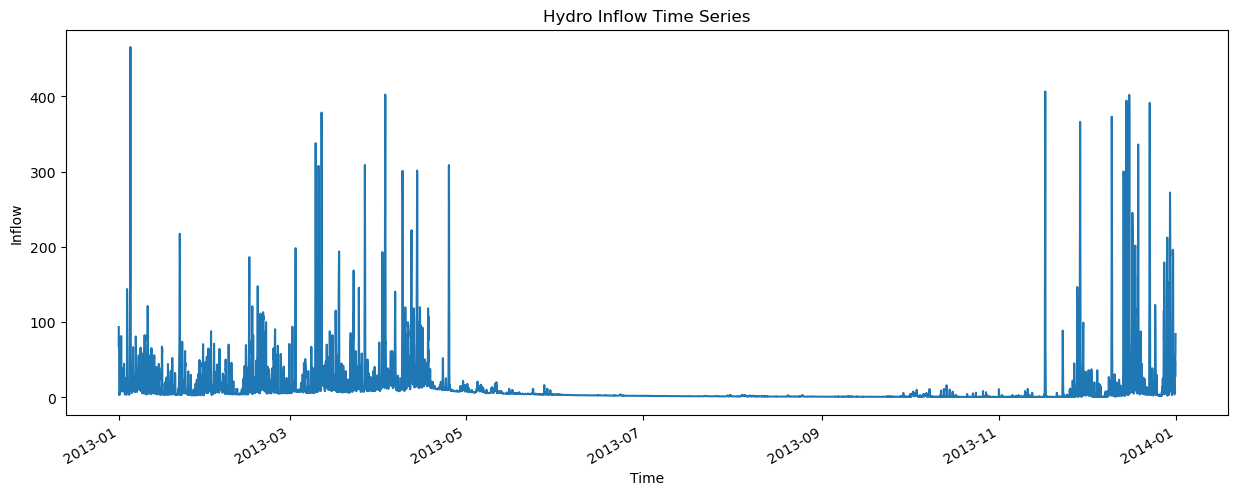

Hydro profile has been saved to Excel.


In [16]:
import xarray as xr

# Load the NetCDF file
hydro_profile = xr.open_dataset('C:/Users/hie/pe_tan/pypsa-earth/resources/veroni/renewable_profiles/profile_hydro.nc')

# Display the structure of the dataset
print(hydro_profile)

# Display the variables in the dataset
print(hydro_profile.variables)

# Display the data for a specific variable (e.g., "inflow")
if "inflow" in hydro_profile:
    print(hydro_profile["inflow"])


import matplotlib.pyplot as plt

# Plot the inflow time series for a specific location (if applicable)
if "inflow" in hydro_profile:
    hydro_profile["inflow"].isel(plant=0).plot(figsize=(15, 5))  # Replace "bus=0" with the appropriate dimension
    plt.title("Hydro Inflow Time Series")
    plt.ylabel("Inflow")
    plt.xlabel("Time")
    plt.show()


import pandas as pd

# Convert the NetCDF dataset to a pandas DataFrame
hydro_df = hydro_profile.to_dataframe()

# Save the DataFrame to an Excel file
hydro_df.reset_index().to_excel('C:/Users/hie/pe_tan/pypsa-earth/resources/veroni/renewable_profiles/profile_hydro.xlsx', index=False)

print("Hydro profile has been saved to Excel.")

Jan inflow time series- existing hydro

In [ ]:
import pandas as pd

# File path to the Excel file
path = "C:/Users/hie/OneDrive - Multiconsult/Dokumenter/NMBU/Master/Model/Hydro inflow/hydro_profile_inp.xlsx"

# Read the Excel file
hydro_df = pd.read_excel(path, sheet_name="input_generation")

# Display the first few rows of the DataFrame for verification
print("Input Data:")
print(hydro_df.head())

# Identify columns representing hours (1 to 8760)
hour_columns = [col for col in hydro_df.columns if col not in ["year", "plant"]]

# Reshape the DataFrame: Melt the hours (columns) into rows
hydro_melted = hydro_df.melt(id_vars=["year", "plant"], value_vars=hour_columns, var_name="time", value_name="inflow")

# Convert the 'inflow' column to numeric, coercing invalid values to NaN
hydro_melted["inflow"] = pd.to_numeric(hydro_melted["inflow"], errors="coerce")

# Handle missing values (e.g., fill with 0 or drop them)
hydro_melted["inflow"] = hydro_melted["inflow"].fillna(0)  # Replace NaN with 0

# Group by 'plant' and 'time' and calculate the average inflow
average_inflow_df = hydro_melted.groupby(["plant", "time"], as_index=False)["inflow"].mean()

# Display the result
print("/nAverage Inflow Time Series:")
print(average_inflow_df.head())

# Save the result to a new Excel file
output_path = "C:/Users/hie/OneDrive - Multiconsult/Dokumenter/NMBU/Master/Model/Hydro inflow/average_hydro_inflow.xlsx"
average_inflow_df.to_excel(output_path, index=False)

print(f"/nAverage inflow time series has been saved to: {output_path}")

Input Data:
   year plant     1     2     3     4     5     6     7     8  ...  8752  \
0  2008  HALE  4.60  4.20  4.11  4.10  3.07  3.62  3.90  4.31  ...  4.03   
1  2009  HALE  5.18  5.18  5.18  5.18  5.18  5.18  8.48  8.62  ...  9.24   
2  2010  HALE  9.23  9.05  9.80  8.60  8.52  7.20  7.36  9.32  ...  4.20   
3  2011  HALE  4.03  4.03  4.40  4.41  4.99  4.30  7.02  7.90  ...  0.00   
4  2012  HALE  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  5.27   

   8753  8754  8755  8756  8757  8758   8759  8760      total  
0  4.41  5.75  8.69  8.35  7.58  8.39   6.84  7.54  60059.609  
1  8.94  8.06  7.70  9.37  8.70  7.89  10.37  9.86  42744.318  
2  4.68  4.81  4.75  7.11  6.99  7.24   4.71  4.58  49001.744  
3  0.00  0.00  0.00  0.00  0.00  0.00   0.00  0.00   2533.480  
4  3.75  4.33  4.71  6.16  6.53  6.81   3.49  4.14  32693.598  

[5 rows x 8763 columns]

Average Inflow Time Series:
  plant time    inflow
0  HALE    1  4.393846
1  HALE    2  4.330000
2  HALE    3  4.161538
3

In [10]:
import pandas as pd

# File path to the input data (in MW/day)
input_file = "C:/Users/hie/OneDrive - Multiconsult/Dokumenter/NMBU/Master/Model/Hydro inflow/hydro_profiles_final.xlsx"  # Replace with your file path
output_file = "C:/Users/hie/OneDrive - Multiconsult/Dokumenter/NMBU/Master/Model/Hydro inflow/hydro_profiles_average.xlsx"  # Replace with your desired output path

# Read the input Excel file
df = pd.read_excel(input_file, sheet_name="hydro_inflow_prosp_res")

print(df.head())  # Display the first few rows of the DataFrame for verification

# Ensure the input data contains the required columns
#power_plants=["Julius Nyerere","Ruhudji","Rumakali","Kikonge","	Songwe Manolo",	"Mpanga","Songwe Sofre","Ikondo Mnyera","Rusumo","Upper Kihansi","Malagaresi","Masigira","Songwe Bipungu","Iringa Nginayo","Iringa Ibosa","Yovi","Matembwe","Darakuta","Andoya","Taveta","Kakono","Tosamaganga"]
#required_columns = ["Month", "Date", ""]
#if not all(col in df.columns for col in required_columns):
#    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Ensure the input data contains the required columns
required_columns = ["Month", "Date"]
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Convert the 'date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract the power plant columns (all columns except 'month' and 'date')
power_plant_columns = [col for col in df.columns if col not in ["Month", "Date"]]

# Convert MW/day to MW/hour for each power plant
hourly_data = []
for _, row in df.iterrows():
    for hour in range(24):
        for plant in power_plant_columns:
            hourly_data.append({
                "plant": plant,
                "datetime": row["Date"] + pd.Timedelta(hours=hour),
                "inflow_mw_per_hour": row[plant] / 24  # Convert daily inflow to hourly inflow
            })

# Create a new DataFrame for hourly data
hourly_df = pd.DataFrame(hourly_data)

# Sort the DataFrame by the 'plant' column
hourly_df = hourly_df.sort_values(by="plant")

# Save the hourly data to an Excel file
hourly_df.to_excel(output_file, index=False)

print(f"Hourly inflow data has been saved to: {output_file}")

        Date  Month  Julius Nyerere        Ruhudji       Rumakali  \
0 2013-01-01      1         1235160  266666.666667  176266.666667   
1 2013-01-02      1         1235160  266666.666667  176266.666667   
2 2013-01-03      1         1235160  266666.666667  176266.666667   
3 2013-01-04      1         1235160  266666.666667  176266.666667   
4 2013-01-05      1         1235160  266666.666667  176266.666667   

        Kikonge  Songwe Manolo        Mpanga  Songwe Sofre  Ikondo Mnyera  \
0  107522.53508   62933.333333  88489.397678         51000  244266.666667   
1  107522.53508   62933.333333  88489.397678         51000  244266.666667   
2  107522.53508   62933.333333  88489.397678         51000  244266.666667   
3  107522.53508   62933.333333  88489.397678         51000  244266.666667   
4  107522.53508   62933.333333  88489.397678         51000  244266.666667   

   ...  Songwe Bipungu  Iringa Nginayo  Iringa Ibosa         Yovi   Matembwe  \
0  ...           10200           35040  24

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_24h.nc has buses, carriers, generators, lines, links, loads, storage_units, stores



Total consumption in TWh: 0.44
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=365, freq=None)
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=365, freq=None)
None


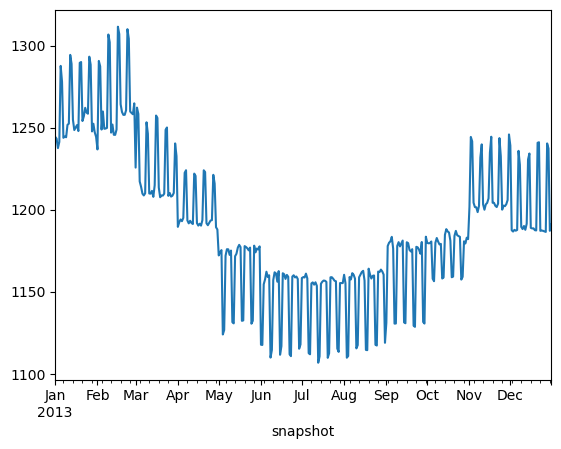

In [62]:
n.iplot(mapbox='osm')

{'data': [Scattermapbox({
      'lat': [-6.7933, -6.7933],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [39.2077, 39.2077],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-2.543, -2.543],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [32.967, 32.967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-6.7988, -6.7988],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [37.6638, 37.6638],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-8.9146, -8.9146],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [33.4967, 33.4967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.4156, -3.4156],
      'line': {'color': 'darkseagreen', 'width': 3},
      'lon': [36.711, 36.711],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.6219, -3.6219],
      'line'

Totalt årlig forbruk i TWh: 0.44
